# TimeSeriesAnalysis-ARIMA
This project is aimed at doing time series forecast using AutoRegressive Integrated Moving Average, ARIMA. The dat sed is the air passenger dataset.

In [48]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
# load data
data = pd.read_csv('AirPassengers.csv')


In [6]:
# data exploration - visualization and wrangling
print(data.shape)
data.head()

(144, 2)


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


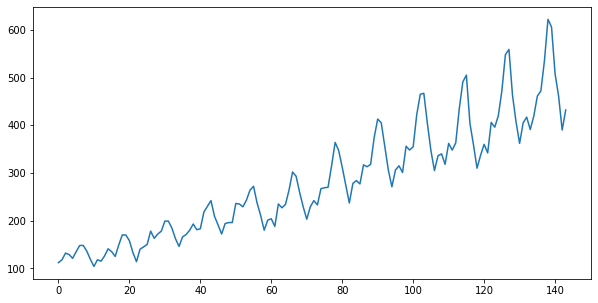

In [14]:
# visualise the time series
plt.figure(figsize=(10,5))
#import rcParams
#from matplotlib.pyplot import rcParams
#rcParamsParams['figure.figsize'] = 10, 5
plt.plot(data['#Passengers'])

In [15]:
data.Month[1]

'1949-02'

In [16]:
# parsing the date strings into datetime format i.e., date becomes the index
data['Month'] = pd.to_datetime(data.Month, infer_datetime_format=True)

# set months as the index
data = data.set_index('Month')
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [17]:
data.shape

(144, 1)

In [18]:
# renaming the column
#data.columns = ['passengers']
data = data.rename(columns={'#Passengers' : 'passengers'})
data.head()

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


Text(0, 0.5, 'Number of air passengers')

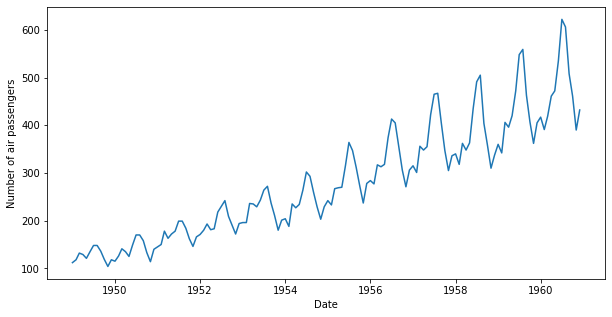

In [20]:
# plot the wrangled data
plt.figure(figsize=(10,5))
plt.plot(data)
plt.xlabel('Date')
plt.ylabel('Number of air passengers')

Shows trend!

In [ ]:
# Testing for stationarity

In [37]:
# determining the rolling statistics
rolMean = data.rolling(window=12).mean()
rolStd = data.rolling(window=12).std()
print(rolMean)
print(rolStd)

            passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]
            passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01   83.630500
1960-09-01   84.617276
1960-10-01   82.541954
1960-11-01   79.502382
1960-12-01   77.737125

[144 rows x 1 columns]


Text(0.5, 1.0, 'Rolling mean and standard deviation')

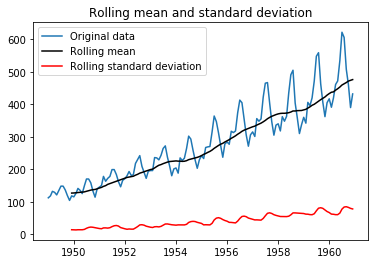

In [38]:
# Plot the rolling statistics for data
data_plot = plt.plot(data, label='Original data')
rolMean_plot = plt.plot(rolMean,color='black', label='Rolling mean')
rolStd_plot = plt.plot(rolStd,color='red', label='Rolling standard deviation')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')


The plot above shows the data is not stationery. Apart from the trend, the rolling mean (moving average) and rolling std(moving std) are not constant. Let us calculate the rolling statistics for the log of the data too (log transformation)

            passengers
Month                 
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791


Text(0, 0.5, 'Log of number of air passengers')

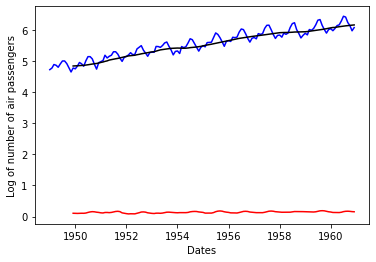

In [50]:
dataLog = np.log(data)
print(dataLog.head())
# Plot the rolling statistics for log of data
movingAverage = dataLog.rolling(window=12).mean()
movingStd = dataLog.rolling(window=12).std()
plt.plot(dataLog, color='blue')
plt.plot(movingAverage, color='black')
plt.plot(movingStd, color='red')
plt.xlabel('Dates')
plt.ylabel('Log of number of air passengers')

In [39]:
# Performing augmented Dickey Fuller test
from statsmodels.tsa.stattools import adfuller
adfTest = adfuller(data['passengers'], autolag='AIC')
adfTest

(0.8153688792060483,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [40]:
adfResult = pd.Series(adfTest[0:4], index=['Test Statistics', 'p-value', 'no of lag used', 'no of observation used']) 
adfResult

Test Statistics             0.815369
p-value                     0.991880
no oof lag used            13.000000
no of observation used    130.000000
dtype: float64

In [41]:
adfTest[4].items()

dict_items([('1%', -3.4816817173418295), ('5%', -2.8840418343195267), ('10%', -2.578770059171598)])

In [42]:
for key, value in adfTest[4].items():
    adfResult['Critical Value (%s)'%key] = value

print(adfResult)


Test Statistics             0.815369
p-value                     0.991880
no oof lag used            13.000000
no of observation used    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


In [44]:
# defining a stationatity test function
def stationarity_test(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()
    
    # plotting rollin statistics
    data_ = plt.plot(timeseries, label='Original data')
    rolMean_plot = plt.plot(movingAverage,color='black', label='Rolling mean')
    rolStd_plot = plt.plot(movingStd,color='red', label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling mean and standard deviation')
    
    # performing adf test
    print('Augmented Dickey Fuller Result')
    adfTest = adfuller(data['passengers'], autolag='AIC')
    adfResult = pd.Series(adfTest[0:4], index=['Test Statistics', 'p-value', 'no of lag used',
                                               'no of observation used']) 
    for key, value in adfTest[4].items():
        adfResult['Critical Value (%s)'%key] = value
    print(adfResult)
    
    

Augmented Dickey Fuller Result
Test Statistics             0.815369
p-value                     0.991880
no of lag used             13.000000
no of observation used    130.000000
Critical Value (1%)        -3.481682
Critical Value (5%)        -2.884042
Critical Value (10%)       -2.578770
dtype: float64


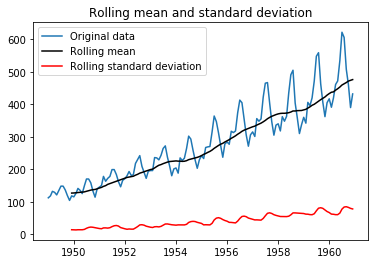

In [45]:
stationarity_test(data)

log transformed data not stationary as shown in the plot since p-value > 0.05  (test statiastics > critical value)  --> accept null hypothesis(data not stationary)
